<b> Assignment - Advanced Regression </b>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

<B> The company wants to know:</b>

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.


<B> Business Goal </b>



You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the

<b> The solution is divided into the following sections:</b>

1.Data understanding and exploration 

2. Data cleaning

3. Data preparation

4. Model building and evaluation

### 1.Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
house_price = pd.read_csv("train.csv")

In [3]:
# summary of the dataset: 1460 rows, 81 columns, no null values
print(house_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Print head to look dataset
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Print column name for data set
print(house_price.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#Drooping first set of column based on null value.
#Id column can be delete it is just a index
Drop_1=["Id"]


In [7]:
house_price=house_price.drop(Drop_1, axis=1)

In [8]:
#to see columns namer after droping data
house_price.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Missing Value Treatment

In [9]:
pd.set_option('display.max_rows', None)


In [10]:
#Lets check Missing values in Data set
missing=house_price.isnull().sum()
print(round((house_price.isnull().sum() * 100/ len(house_price)),2).sort_values(ascending=False))
   


PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageYrBlt       5.55
GarageCond        5.55
GarageType        5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtCond          2.53
BsmtQual          2.53
BsmtFinType1      2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
MSSubClass        0.00
Fireplaces        0.00
Functional        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleConditi

In [11]:
#Handling FireplaceQu variable
print(house_price.FireplaceQu.describe())
print(house_price.FireplaceQu.value_counts())

count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [12]:
#Handeling Alley","Fence","MiscFeature","PoolQC
house_price.Alley.replace(np.nan,"No alley access", inplace=True)
house_price.Fence.replace(np.nan,"No Fence", inplace=True)
house_price.MiscFeature.replace(np.nan,"No MiscFeature", inplace=True)
house_price.PoolQC.replace(np.nan,"No Pool", inplace=True)

In [13]:
#filling NA with No Fireplace 
house_price.FireplaceQu.replace(np.nan,"No Fireplace", inplace=True)

In [14]:
#Handling Missing Value for LotFrontage
house_price.LotFrontage.replace(np.nan,0, inplace=True)


In [15]:
#Handling Missing Value for GarageType
house_price.GarageType.replace(np.nan,"No Garage", inplace=True)


In [16]:
#Handling Missing Value for GarageFinish
house_price.GarageFinish.replace(np.nan,"No Garage", inplace=True)

In [17]:
#Handling Missing Value for GarageFinish
house_price.GarageFinish.replace(np.nan,"No Garage", inplace=True)

In [18]:
#Handling Missing Value for GarageQual
house_price.GarageQual.replace(np.nan,"No Garage", inplace=True)


In [19]:
#Handling Missing Value for GarageCond
house_price.GarageCond.replace(np.nan,"No Garage", inplace=True)


In [20]:
#Handling Missing Value for BsmtExposure,BsmtFinType2,BsmtQual,BsmtCond,BsmtFinType1
house_price.BsmtExposure.replace(np.nan,"No Basement", inplace=True)
house_price.BsmtFinType2.replace(np.nan,"No Basement", inplace=True)
house_price.BsmtQual.replace(np.nan,"No Basement", inplace=True)
house_price.BsmtCond.replace(np.nan,"No Basement", inplace=True)
house_price.BsmtFinType1.replace(np.nan,"No Basement", inplace=True)

In [21]:
#Handling Missing Value for GarageYrBlt with 0 i.e. No Garage
house_price.GarageYrBlt = house_price.GarageYrBlt.fillna(0)

In [22]:
#Handling Missing Value for MasVnrType and MasVnrArea
house_price.MasVnrType.replace(np.nan,"None", inplace=True)
house_price.MasVnrArea.replace(np.nan,0, inplace=True)

In [23]:
#impute missing values of Electrical with mode due to categorical column
house_price.Electrical = house_price.Electrical.fillna(house_price.Electrical.mode()[0])    

In [24]:
#Handeling YearBuilt,YearRemodAdd and GarageYrBlt
import datetime
#converting year to number of years
house_price['YearBuilt'] = datetime.datetime.now().year - house_price['YearBuilt']
house_price['YearRemodAdd'] = datetime.datetime.now().year - house_price['YearRemodAdd']
house_price['GarageYrBlt'] = datetime.datetime.now().year - house_price['GarageYrBlt']


In [25]:
house_price.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [26]:
#converting from int type to object to treat the variables as categorical variables
house_price['MSSubClass'] = house_price['MSSubClass'].astype('object')
house_price['OverallQual'] = house_price['OverallQual'].astype('object')
house_price['OverallCond'] = house_price['OverallCond'].astype('object')
house_price['BsmtFullBath'] = house_price['BsmtFullBath'].astype('object')
house_price['BsmtHalfBath'] = house_price['BsmtHalfBath'].astype('object')
house_price['FullBath'] = house_price['FullBath'].astype('object')
house_price['HalfBath'] = house_price['HalfBath'].astype('object')
house_price['BedroomAbvGr'] = house_price['BedroomAbvGr'].astype('object')
house_price['KitchenAbvGr'] = house_price['KitchenAbvGr'].astype('object')
house_price['TotRmsAbvGrd'] = house_price['TotRmsAbvGrd'].astype('object')
house_price['Fireplaces'] = house_price['Fireplaces'].astype('object')
house_price['GarageCars'] = house_price['GarageCars'].astype('object')

In [27]:
# summary of the dataset: 1460 rows, 81 columns, no null values
print(house_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [28]:
#Lets check if all Missing values taken care
missing=house_price.isnull().sum()
print(round((house_price.isnull().sum() * 100/ len(house_price)),2).sort_values(ascending=False))

MSSubClass       0.0
MSZoning         0.0
GarageYrBlt      0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
PoolQC           0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolArea         0.0
GarageQual       0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
LandSlope        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2   

###  Univariate Data Analysis


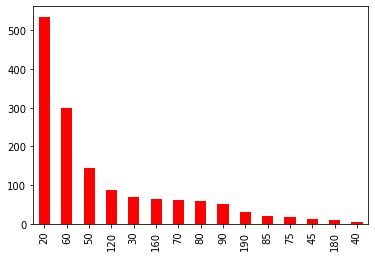

In [29]:
#Bar chart for MSSubClass (categorical ) variable
house_price.MSSubClass.value_counts().plot.bar(color="Red")
plt.show()

#Data shows that highest no of data belong from 1-STORY 1946 & NEWER ALL STYLES(20)

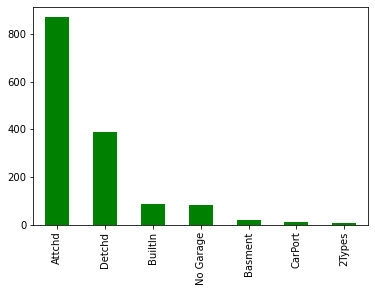

In [30]:
#Bar chart for GarageType (categorical ) variable
house_price.GarageType.value_counts().plot.bar(color="Green")
plt.show()

#Data shows that highest no of data belong from attached category

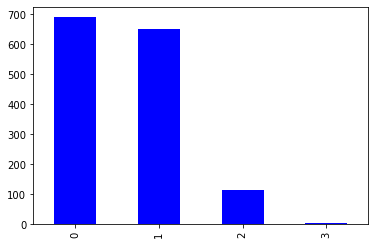

In [31]:
#Bar chart for Fireplaces (categorical ) variable
house_price.Fireplaces.value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house either dont have Fireplaces or 1 Fireplaces.

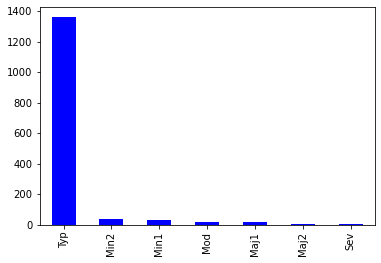

In [32]:
#Bar chart for Functional (categorical ) variable
house_price.Functional.value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house fall into Typical Functionality group.

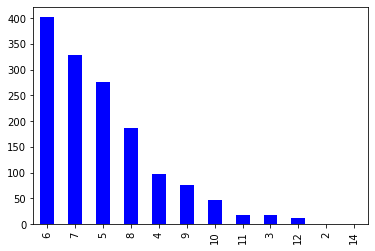

In [33]:
#Bar chart for TotRmsAbvGrd (categorical ) variable
house_price.TotRmsAbvGrd.value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house has Total rooms above grade is 6

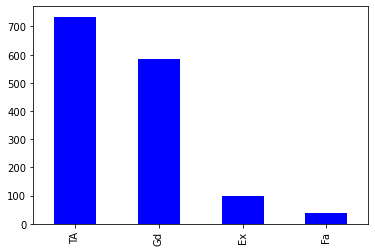

In [34]:
#Bar chart for KitchenQual (categorical ) variable
house_price.KitchenQual.value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house Kitchen quality is Typical/Average

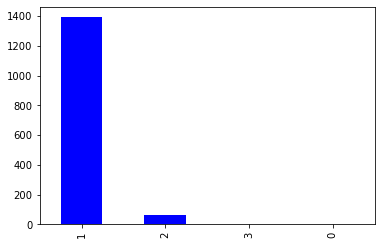

In [35]:
#Bar chart for KitchenAbvGr (categorical ) variable
house_price.KitchenAbvGr.value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house has  KitchenAbvGr 1

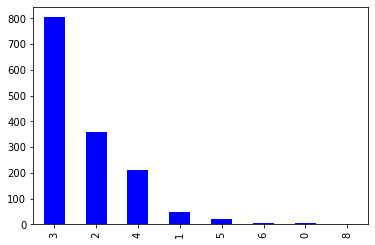

In [36]:
#Bar chart for BedroomAbvGr (categorical ) variable
house_price.BedroomAbvGr.value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house has  BedroomAbvGr 3

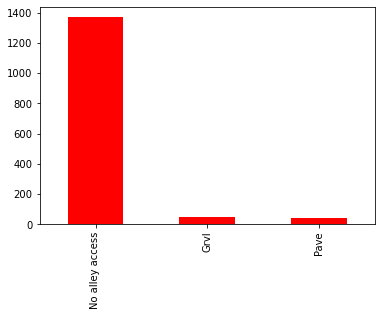

In [37]:
#Bar chart for Alley (categorical ) variable
house_price.Alley.value_counts().plot.bar(color="red")
plt.show()

#Data shows that maximum house has  no alley access

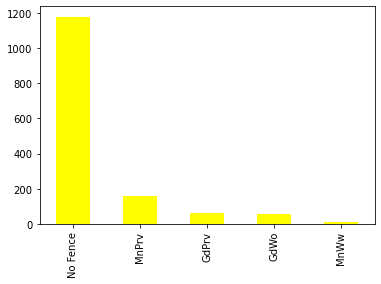

In [38]:
#Bar chart for Fence (categorical ) variable
house_price.Fence.value_counts().plot.bar(color="yellow")
plt.show()

#Data shows that maximum house has  no Fence

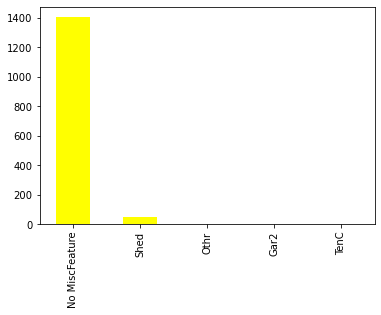

In [39]:
#Bar chart for MiscFeature (categorical ) variable
house_price.MiscFeature.value_counts().plot.bar(color="yellow")
plt.show()

#Data shows that maximum house has  no MiscFeature

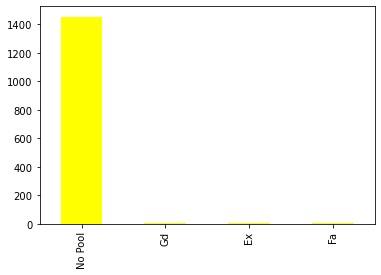

In [40]:
#Bar chart for PoolQC (categorical ) variable
house_price.PoolQC.value_counts().plot.bar(color="yellow")
plt.show()

#Data shows that maximum house has  no pool

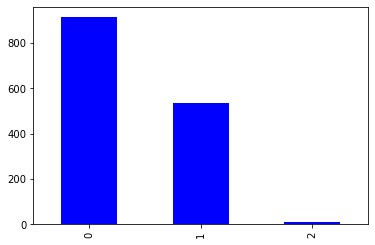

In [41]:
#Bar chart for HalfBath (categorical ) variable
house_price.HalfBath.value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house does not have Half baths above grade


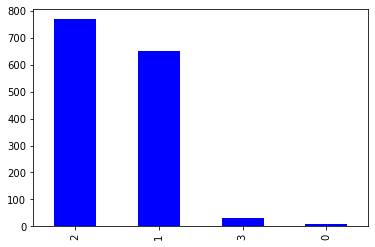

In [42]:
#Bar chart for FullBath  (categorical ) variable
house_price.FullBath .value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house has 2 Full bathrooms above grade.

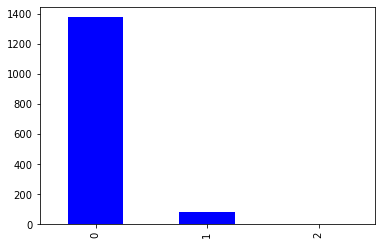

In [43]:
#Bar chart for BsmtHalfBath  (categorical ) variable
house_price.BsmtHalfBath .value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house does not have Basement half bathrooms

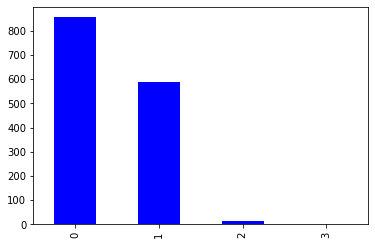

In [44]:
#Bar chart for BsmtFullBath  (categorical ) variable
house_price.BsmtFullBath .value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house does not have Basement full bathrooms

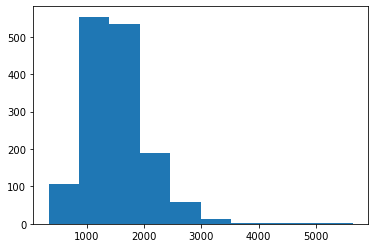

In [45]:
#Hist for GrLivArea (Conti..) variable

plt.hist(house_price.GrLivArea)
plt.show()


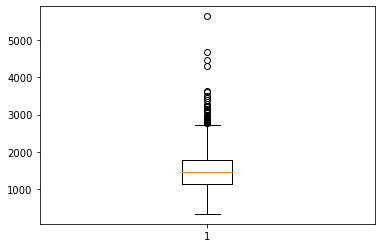

In [46]:
#Box plot  for GrLivArea (Conti..) variable

plt.boxplot(house_price.GrLivArea)
plt.show()


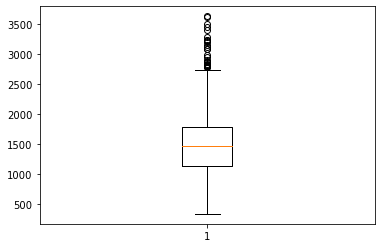

In [47]:
#Treating oullier for GrLivArea
Q1 = house_price['GrLivArea'].quantile(0.1)
Q3 = house_price['GrLivArea'].quantile(0.9)
IQR = Q3 - Q1
house_price = house_price[(house_price['GrLivArea'] >= Q1 - 1.5*IQR) & 
                      (house_price['GrLivArea'] <= Q3 + 1.5*IQR)]

plt.boxplot(house_price.GrLivArea)
plt.show()


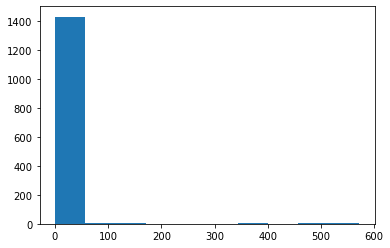

In [48]:
#Hist for LowQualFinSF (Conti..) variable
plt.hist(house_price.LowQualFinSF)
plt.show()

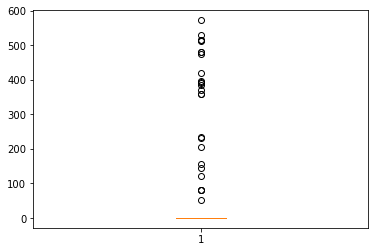

In [49]:
#Box plot  for LowQualFinSF (Conti..) variable

plt.boxplot(house_price.LowQualFinSF)
plt.show()


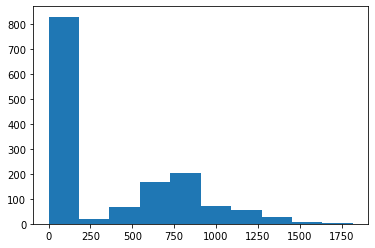

In [50]:
#Hist for 2ndFlrSF (Conti..) variable
plt.hist(house_price["2ndFlrSF"])
plt.show()


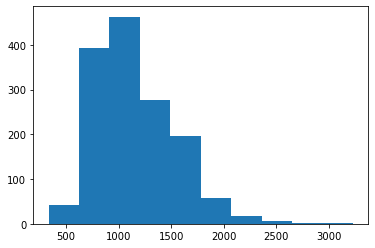

In [51]:
#Hist for 2ndFlrSF (Conti..) variable
plt.hist(house_price["1stFlrSF"])
plt.show()

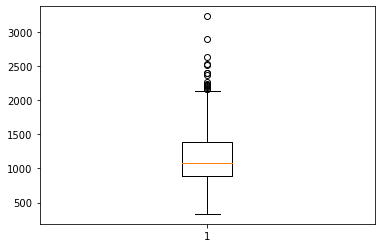

In [52]:
plt.boxplot(house_price["1stFlrSF"])
plt.show()

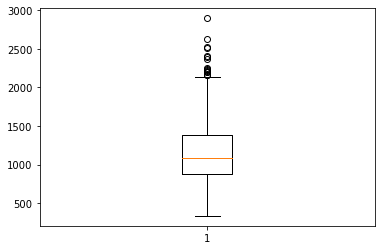

In [53]:
#Treating oullier for 1stFlrSF
Q1 = house_price['1stFlrSF'].quantile(0.1)
Q3 = house_price['1stFlrSF'].quantile(0.9)
IQR = Q3 - Q1
house_price = house_price[(house_price['1stFlrSF'] >= Q1 - 1.5*IQR) & 
                      (house_price['1stFlrSF'] <= Q3 + 1.5*IQR)]

plt.boxplot(house_price['1stFlrSF'])
plt.show()

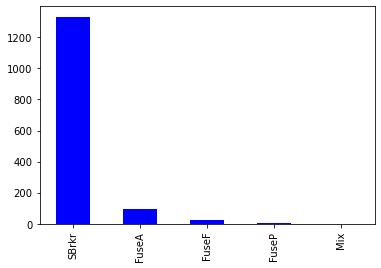

In [54]:
#Bar chart for Electrical   (categorical ) variable
house_price.Electrical  .value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house has Standard Circuit Breakers & Romex

In [55]:
#need to update GarageYrBlt

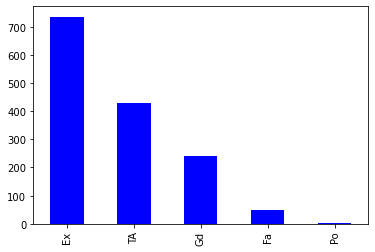

In [56]:
#Bar chart for HeatingQC  (categorical ) variable
house_price.HeatingQC.value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house belongs Excellent Heating quality and condition category

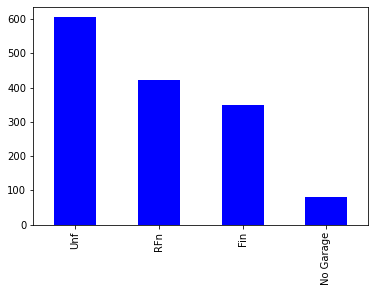

In [57]:
#Bar chart for GarageFinish  (categorical ) variable
house_price.GarageFinish.value_counts().plot.bar(color="blue")
plt.show()

#Data shows that maximum house has Unfinished type Interior finish of the garage

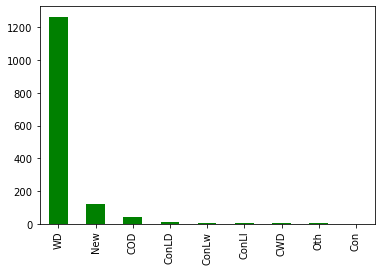

In [58]:
#Bar chart for SaleType  (categorical ) variable
house_price.SaleType.value_counts().plot.bar(color="green")
plt.show()

#Data shows that maximum house sales type is Warranty Deed

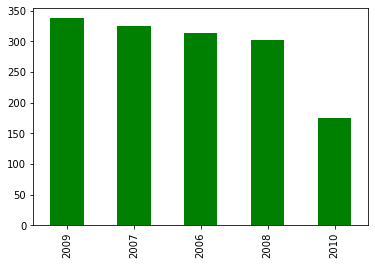

In [59]:
#Bar chart for YrSold  (categorical ) variable
house_price.YrSold.value_counts().plot.bar(color="green")
plt.show()

#Data shows that maximum house Year Sold is 2009


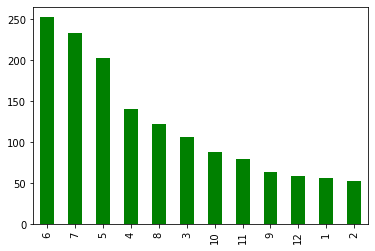

In [60]:
#Bar chart for MoSold  (categorical ) variable
house_price.MoSold.value_counts().plot.bar(color="green")
plt.show()

#Data shows that maximum house Month Sold is June(6)

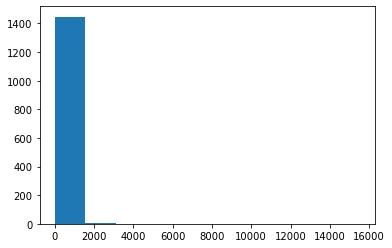

In [61]:
#Hist for MiscVal  (Conti..) variable
plt.hist(house_price["MiscVal"])
plt.show()

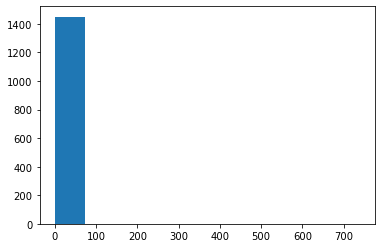

In [62]:
#Hist for PoolArea  (Conti..) variable
plt.hist(house_price["PoolArea"])
plt.show()

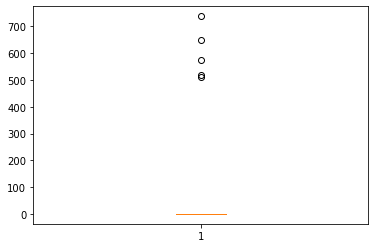

In [63]:
plt.boxplot(house_price["PoolArea"])
plt.show()

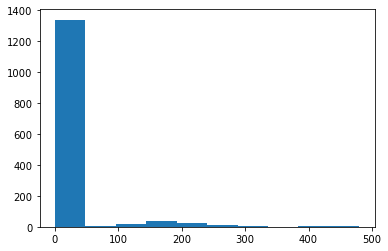

In [64]:
#Hist for ScreenPorch  (Conti..) variable
plt.hist(house_price["ScreenPorch"])
plt.show()

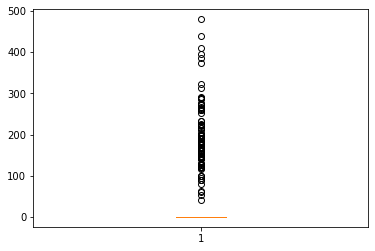

In [65]:
plt.boxplot(house_price["ScreenPorch"])
plt.show()

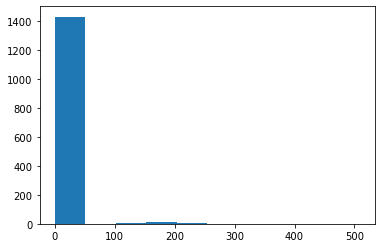

In [66]:
#Hist for 3SsnPorch   (Conti..) variable
plt.hist(house_price["3SsnPorch"])
plt.show()

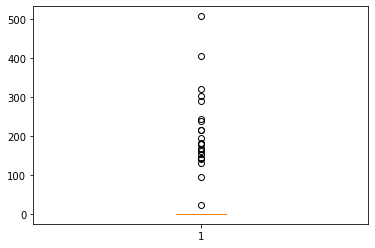

In [67]:
plt.boxplot(house_price["3SsnPorch"])
plt.show()

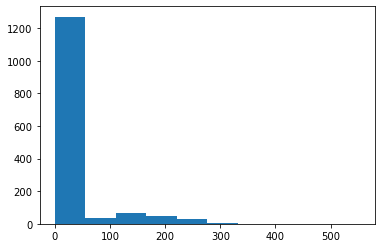

In [68]:
#Hist for EnclosedPorch   (Conti..) variable
plt.hist(house_price["EnclosedPorch"])
plt.show()


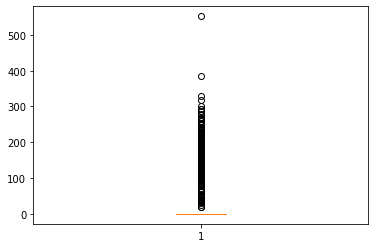

In [69]:
plt.boxplot(house_price["EnclosedPorch"])
plt.show()

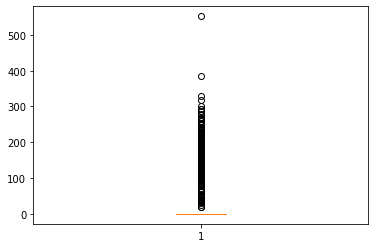

In [70]:
# outlier treatment

plt.boxplot(house_price['EnclosedPorch'])
Q10 = house_price['EnclosedPorch'].quantile(0.1)
Q90 = house_price['EnclosedPorch'].quantile(0.9)
IQR_90_10 = Q90 - Q10
house_price = house_price[(house_price['EnclosedPorch'] >= Q10 - 1.5*IQR_90_10) & 
                      (house_price['EnclosedPorch'] <= Q90 + 1.5*IQR_90_10)]

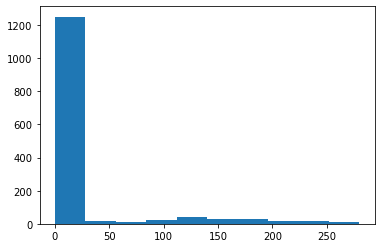

In [71]:
#Hist for EnclosedPorch   (Conti..) variable
plt.hist(house_price["EnclosedPorch"])
plt.show()

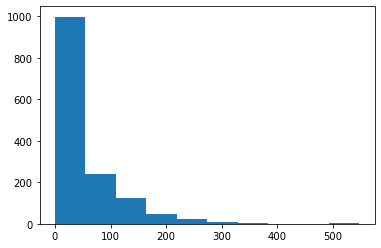

In [72]:
#Hist for OpenPorchSF   (Conti..) variable
plt.hist(house_price["OpenPorchSF"])
plt.show()


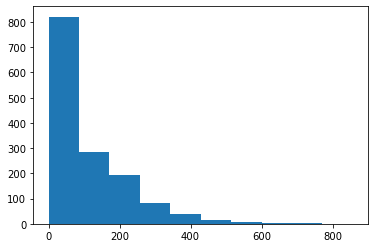

In [73]:
#Hist for WoodDeckSF   (Conti..) variable
plt.hist(house_price["WoodDeckSF"])
plt.show()


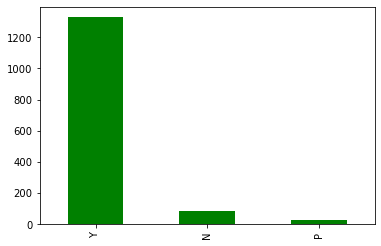

In [74]:
#Bar chart for PavedDrive(categorical ) variable
house_price.PavedDrive.value_counts().plot.bar(color="green")
plt.show()

#Data shows that maximum house has Paved driveway

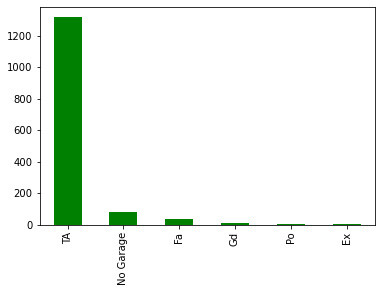

In [75]:
#Bar chart for GarageCond(categorical ) variable
house_price.GarageCond.value_counts().plot.bar(color="green")
plt.show()

#Data shows that maximum house Garage condition is Typical/Average


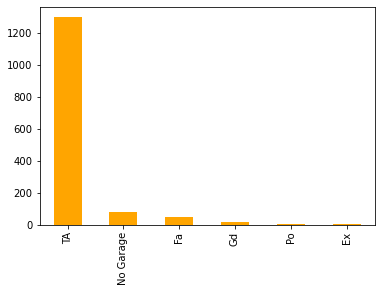

In [76]:
#Bar chart for GarageQual(categorical ) variable
house_price.GarageQual.value_counts().plot.bar(color="orange")
plt.show()

#Data shows that maximum house Garage quality  is Typical/Average



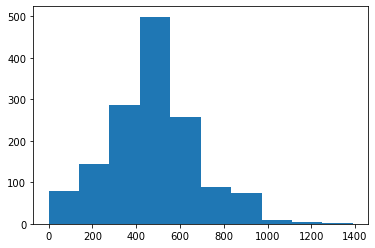

In [77]:
#Hist for GarageArea   (Conti..) variable
plt.hist(house_price["GarageArea"])
plt.show()

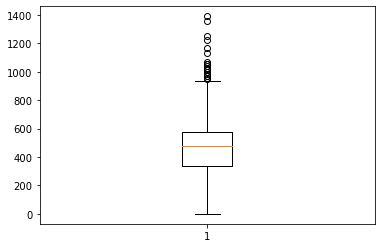

In [78]:
plt.boxplot(house_price["GarageArea"])
plt.show()

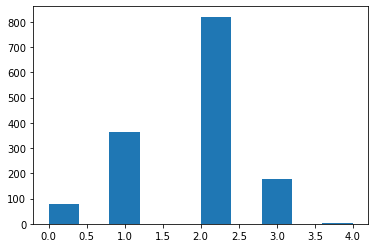

In [79]:
#Hist for GarageCars (Conti..) variable
plt.hist(house_price["GarageCars"])
plt.show()


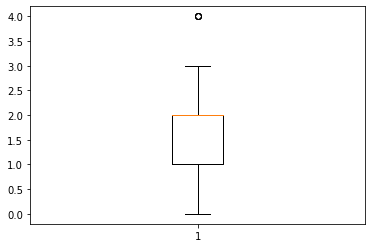

In [80]:
plt.boxplot(house_price["GarageCars"])
plt.show()

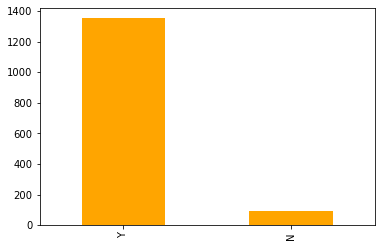

In [81]:
#Bar chart for CentralAir(categorical ) variable
house_price.CentralAir.value_counts().plot.bar(color="orange")
plt.show()

#Data shows that maximum house has Central air conditioning

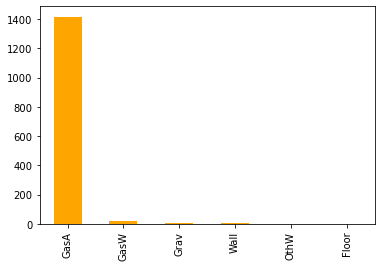

In [82]:
#Bar chart for Heating(categorical ) variable
house_price.Heating.value_counts().plot.bar(color="orange")
plt.show()

#Data shows that maximum house Type of heating is Gas hot water or steam heat


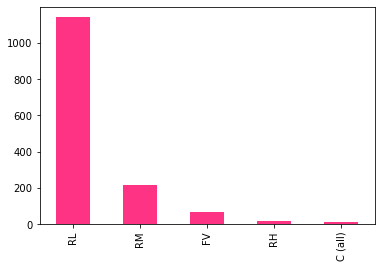

In [83]:
#Bar chart for MSZoning(categorical ) variable
house_price.MSZoning.value_counts().plot.bar(color="#FF3384")
plt.show()

#Maximum Identifies the general zoning classification of the sale as Residential Low Density


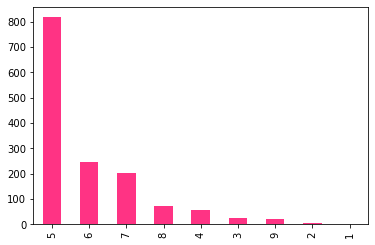

In [84]:

#Bar chart for OverallCond(categorical ) variable
house_price.OverallCond.value_counts().plot.bar(color="#FF3384")
plt.show()

#Maximum Rates the overall condition of the house is Average


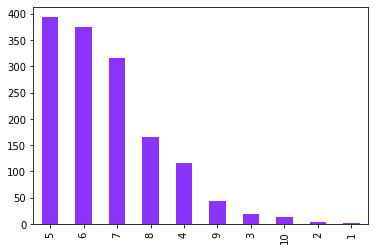

In [85]:
#Bar chart for OverallQual(categorical ) variable
house_price.OverallQual.value_counts().plot.bar(color="#8A33FF")
plt.show()

#Maximum Rates the overall material and finish of the house is Average


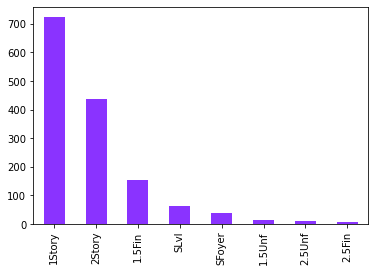

In [86]:
#Bar chart for HouseStyle(categorical ) variable
house_price.HouseStyle.value_counts().plot.bar(color="#8A33FF")
plt.show()

#Maximum Style of dwelling is One story



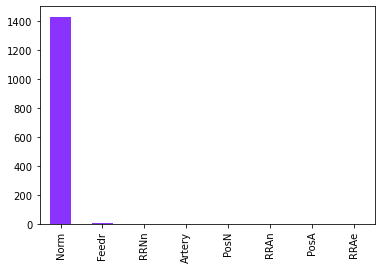

In [87]:
#Bar chart for Condition2(categorical ) variable
house_price.Condition2.value_counts().plot.bar(color="#8A33FF")
plt.show()

#Maximum house Proximity to various conditions is Normal



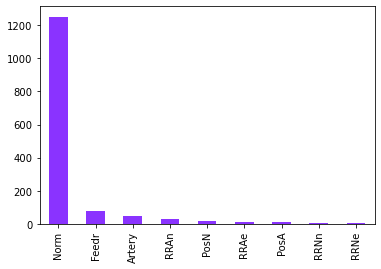

In [88]:
#Bar chart for Condition1(categorical ) variable
house_price.Condition1.value_counts().plot.bar(color="#8A33FF")
plt.show()

#Maximum house Proximity to various condition2 is Normal

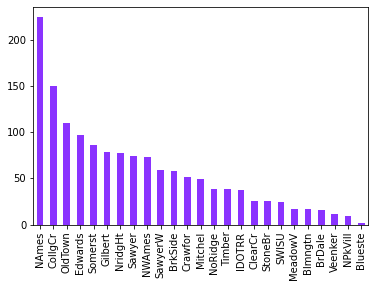

In [89]:
#Bar chart for Neighborhood(categorical ) variable
house_price.Neighborhood.value_counts().plot.bar(color="#8A33FF")
plt.show()

#Maximum Physical locations within Ames city limits is North Ames


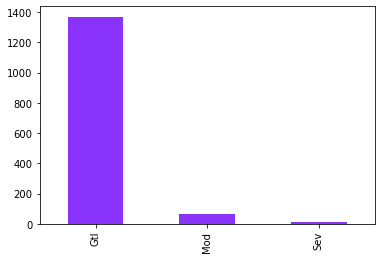

In [90]:
#Bar chart for LandSlope(categorical ) variable
house_price.LandSlope.value_counts().plot.bar(color="#8A33FF")
plt.show()

#Maximum Slope of property is Gentle slope


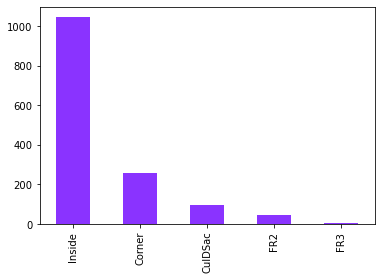

In [91]:
#Bar chart for LotConfig(categorical ) variable
house_price.LotConfig.value_counts().plot.bar(color="#8A33FF")
plt.show()

#Maximum house Lot configuration is inside


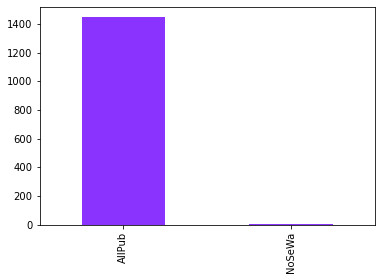

In [92]:
#Bar chart for Utilities(categorical ) variable
house_price.Utilities.value_counts().plot.bar(color="#8A33FF")
plt.show()

#Maximum house Utilities type is All public Utilities



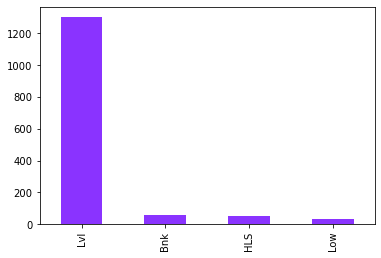

In [93]:
#Bar chart for LandContour(categorical ) variable
house_price.LandContour.value_counts().plot.bar(color="#8A33FF")
plt.show()

#Maximum Flatness of the property is Near Flat/Level

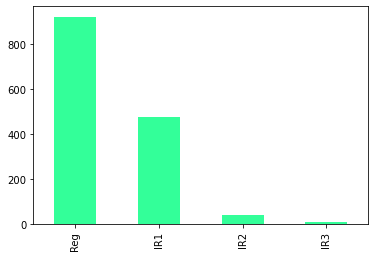

In [94]:
#Bar chart for LotShape(categorical ) variable
house_price.LotShape.value_counts().plot.bar(color="#33FF99")
plt.show()

#Maximum General shape of property is regular


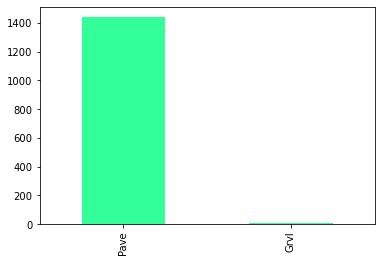

In [95]:
#Bar chart for Street(categorical ) variable
house_price.Street.value_counts().plot.bar(color="#33FF99")
plt.show()

#Maximum Type of road access to property is Paved



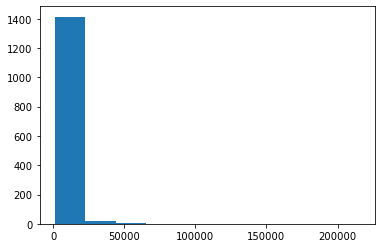

In [96]:
#Bar chart for LotArea variable
plt.hist(house_price["LotArea"])
plt.show()




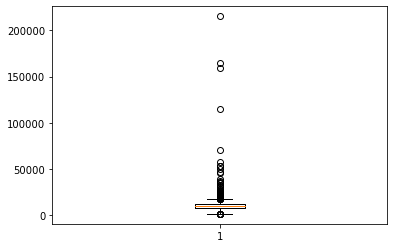

In [97]:
plt.boxplot(house_price["LotArea"])
plt.show()

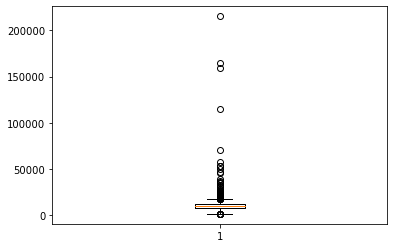

In [98]:
# outlier treatment

plt.boxplot(house_price['LotArea'])
Q10 = house_price['LotArea'].quantile(0.1)
Q90 = house_price['LotArea'].quantile(0.9)
IQR_90_10 = Q90 - Q10
house_price = house_price[(house_price['LotArea'] >= Q10 - 1.5*IQR_90_10) & 
                      (house_price['LotArea'] <= Q90 + 1.5*IQR_90_10)]

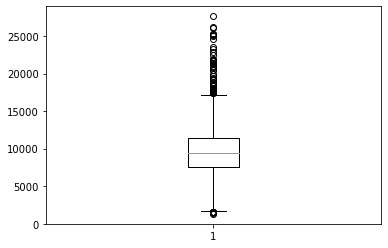

In [99]:
plt.boxplot(house_price["LotArea"])
plt.show()

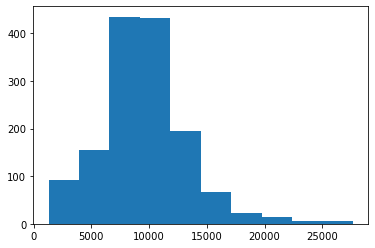

In [100]:
#Hist chart for LotArea variable
plt.hist(house_price["LotArea"])
plt.show()



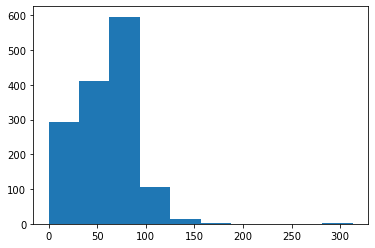

In [101]:
#Hist chart for LotFrontage variable
plt.hist(house_price["LotFrontage"])
plt.show()


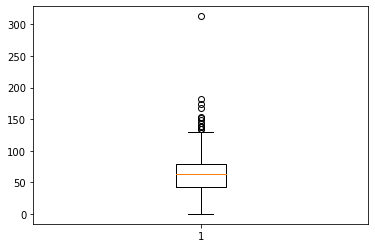

In [102]:
plt.boxplot(house_price["LotFrontage"])
plt.show()

(1424, 80)

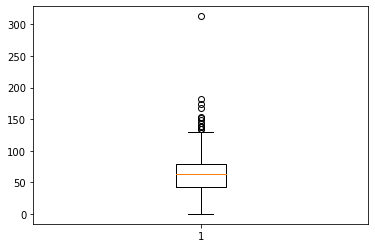

In [103]:
# outlier treatment
plt.boxplot(house_price['LotFrontage'])
Q10 = house_price['LotFrontage'].quantile(0.1)
Q90 = house_price['LotFrontage'].quantile(0.9)
IQR_90_10 = Q90 - Q10
house_price = house_price[(house_price['LotFrontage'] >= Q10 - 1.5*IQR_90_10) & 
                      (house_price['LotFrontage'] <= Q90 + 1.5*IQR_90_10)]
house_price.shape

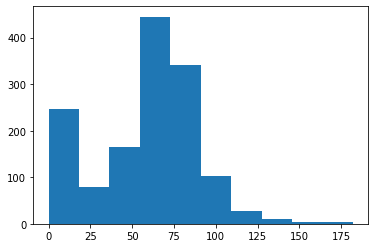

In [104]:
#Hist chart for LotFrontage variable
plt.hist(house_price["LotFrontage"])
plt.show()


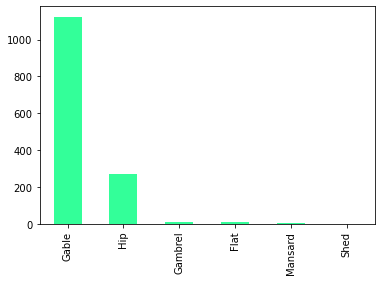

In [105]:
#Bar chart for RoofStyle(categorical ) variable
house_price.RoofStyle.value_counts().plot.bar(color="#33FF99")
plt.show()

#Maximum Type of roof is Type of roof


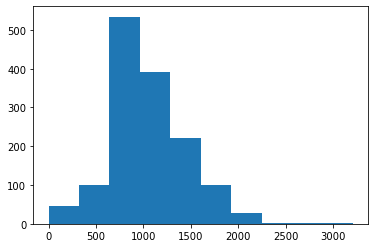

In [106]:
#Hist chart for TotalBsmtSF variable
plt.hist(house_price["TotalBsmtSF"])
plt.show()



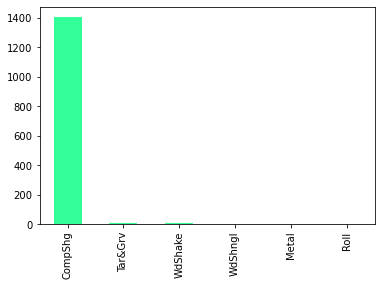

In [107]:
#Bar chart for RoofMatl(categorical ) variable
house_price.RoofMatl.value_counts().plot.bar(color="#33FF99")
plt.show()

#Maximum house Roof material is Standard (Composite) Shingle




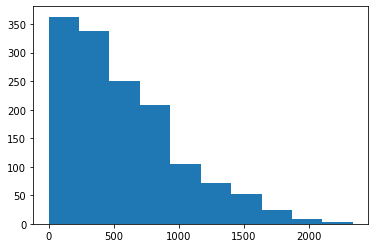

In [108]:
#Hist chart for BsmtUnfSF variable
plt.hist(house_price["BsmtUnfSF"])
plt.show()



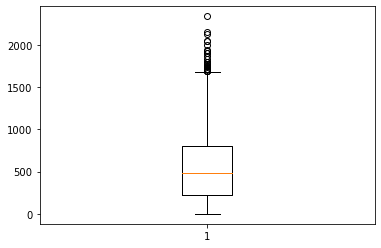

In [109]:
plt.boxplot(house_price["BsmtUnfSF"])
plt.show()

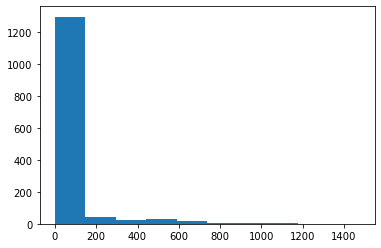

In [110]:
#Hist chart for BsmtFinSF2 variable
plt.hist(house_price["BsmtFinSF2"])
plt.show()

 

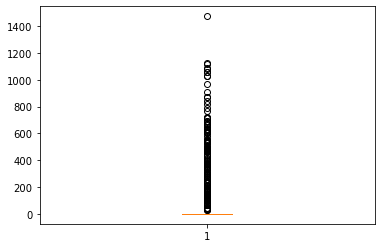

In [111]:
plt.boxplot(house_price["BsmtFinSF2"])
plt.show()

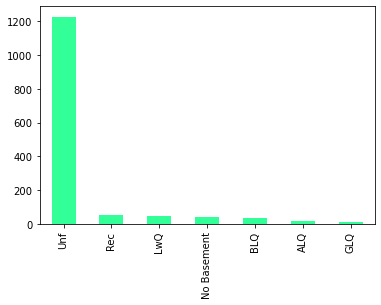

In [112]:
#Bar chart for BsmtFinType2(categorical ) variable
house_price.BsmtFinType2.value_counts().plot.bar(color="#33FF99")
plt.show()

#Maximum Rating of basement finished area is Unfinshed


 

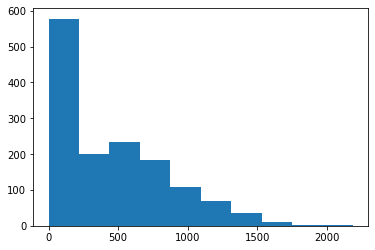

In [113]:
#Hist chart for BsmtFinSF1 variable
plt.hist(house_price["BsmtFinSF1"])
plt.show()



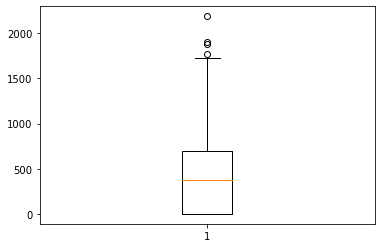

In [114]:
plt.boxplot(house_price["BsmtFinSF1"])
plt.show()

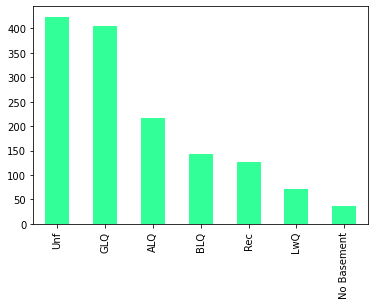

In [115]:
#Bar chart for BsmtFinType1(categorical ) variable
house_price.BsmtFinType1.value_counts().plot.bar(color="#33FF99")
plt.show()

#Maximum Rating of basement finished are Unfinshed



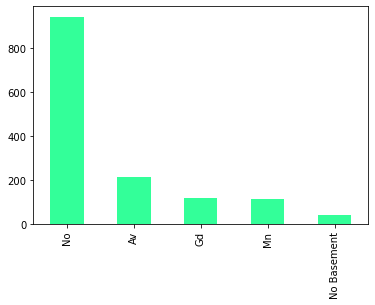

In [116]:
#Bar chart for BsmtExposure(categorical ) variable
house_price.BsmtExposure.value_counts().plot.bar(color="#33FF99")
plt.show()

#Maximum Refers to walkout or garden level walls is No Exposure


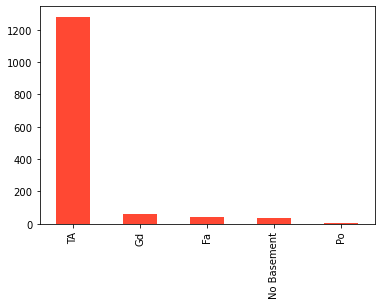

In [117]:
#Bar chart for BsmtCond(categorical ) variable
house_price.BsmtCond.value_counts().plot.bar(color="#FF4833")
plt.show()

#Maximum Evaluates the general condition of the basement is ypical - slight dampness allowed
 

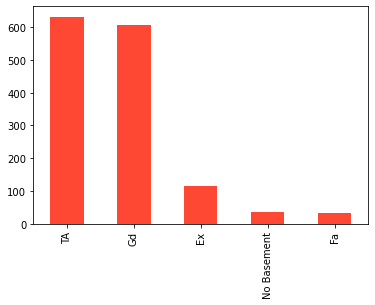

In [118]:
#Bar chart for BsmtQual(categorical ) variable
house_price.BsmtQual.value_counts().plot.bar(color="#FF4833")
plt.show()

#Maximum Evaluates the height of the basement is Good (90-99 inches)

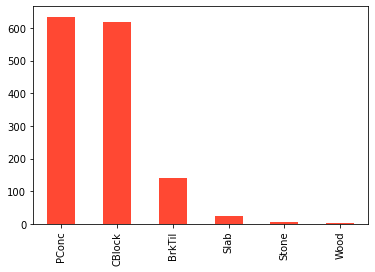

In [119]:
#Bar chart for Foundation(categorical ) variable
house_price.Foundation.value_counts().plot.bar(color="#FF4833")
plt.show()

#Maximum house Type of foundation is Poured Contrete


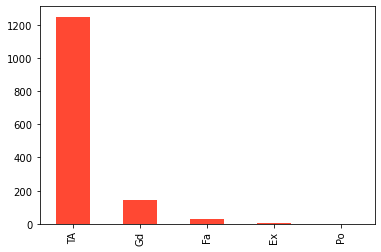

In [120]:
#Bar chart for ExterCond(categorical ) variable
house_price.ExterCond.value_counts().plot.bar(color="#FF4833")
plt.show()

#Maximum Evaluates the present condition of the material on the exterior is Average/Typical


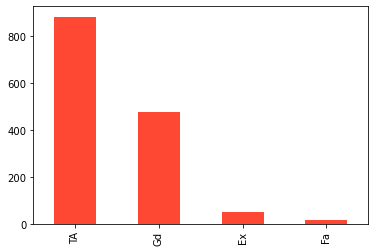

In [121]:
#Bar chart for ExterQual(categorical ) variable
house_price.ExterQual.value_counts().plot.bar(color="#FF4833")
plt.show()

#Maximum Evaluates the quality of the material on the exterior is Average/Typical

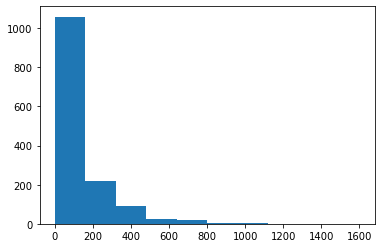

In [122]:
#Hist chart for MasVnrArea variable
plt.hist(house_price["MasVnrArea"])
plt.show()



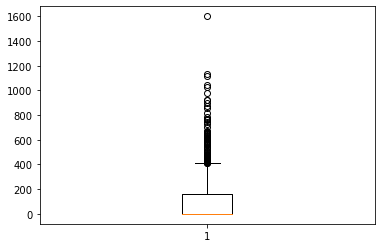

In [123]:
plt.boxplot(house_price["MasVnrArea"])
plt.show()

(1412, 80)

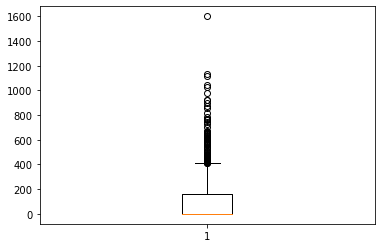

In [124]:
# outlier treatment
plt.boxplot(house_price['MasVnrArea'])
Q1 = house_price['MasVnrArea'].quantile(0.1)
Q3 = house_price['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
house_price = house_price[(house_price['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (house_price['MasVnrArea'] <= Q3 + 1.5*IQR)]
house_price.shape

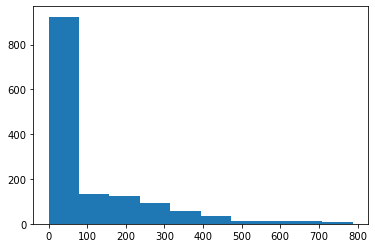

In [125]:
#Hist chart for MasVnrArea variable
plt.hist(house_price["MasVnrArea"])
plt.show()

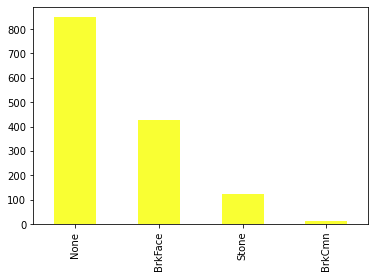

In [126]:
#Bar chart for MasVnrType(categorical ) variable
house_price.MasVnrType.value_counts().plot.bar(color="#F9FF33")
plt.show()
#Maximum house dont have Masonry veneer type

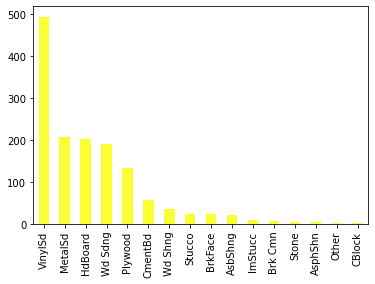

In [127]:
#Bar chart for Exterior2nd(categorical ) variable
house_price.Exterior2nd.value_counts().plot.bar(color="#F9FF33")
plt.show()
#Maximum Exterior covering on house type is Vinyl Siding


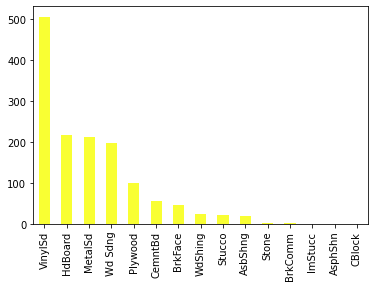

In [128]:
#Bar chart for Exterior1st(categorical ) variable
house_price.Exterior1st.value_counts().plot.bar(color="#F9FF33")
plt.show()
#Maximum Exterior covering on house type is Vinyl Siding

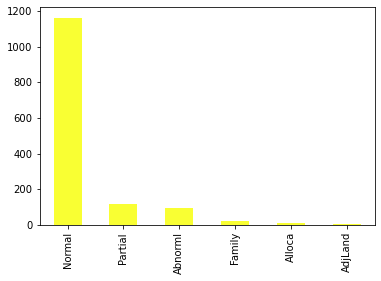

In [129]:
#Bar chart for SaleCondition(categorical ) variable
house_price.SaleCondition.value_counts().plot.bar(color="#F9FF33")
plt.show()
#Maximum house Condition of sale ios Normal


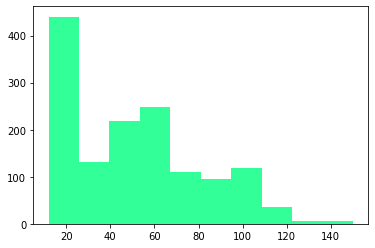

In [130]:
#Hist chart for YearBuilt variable
plt.hist(house_price["YearBuilt"],color="#33FF99")
plt.show()

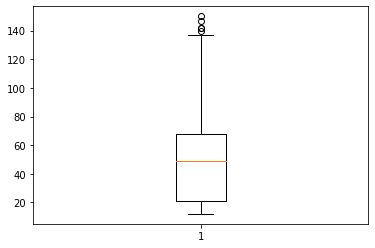

In [131]:
plt.boxplot(house_price["YearBuilt"])
plt.show()

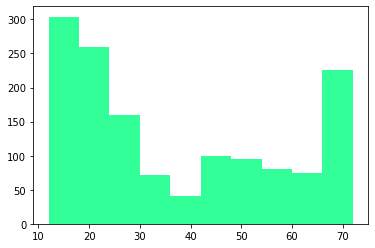

In [132]:
#Hist chart for YearRemodAdd variable
plt.hist(house_price["YearRemodAdd"],color="#33FF99")
plt.show()

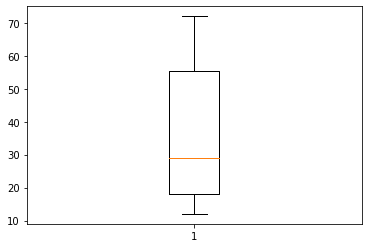

In [133]:
plt.boxplot(house_price["YearRemodAdd"])
plt.show()

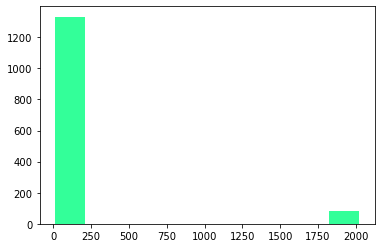

In [134]:
#Hist chart for GarageYrBlt variable
plt.hist(house_price["GarageYrBlt"],color="#33FF99")
plt.show()

### Bivariate Analysis

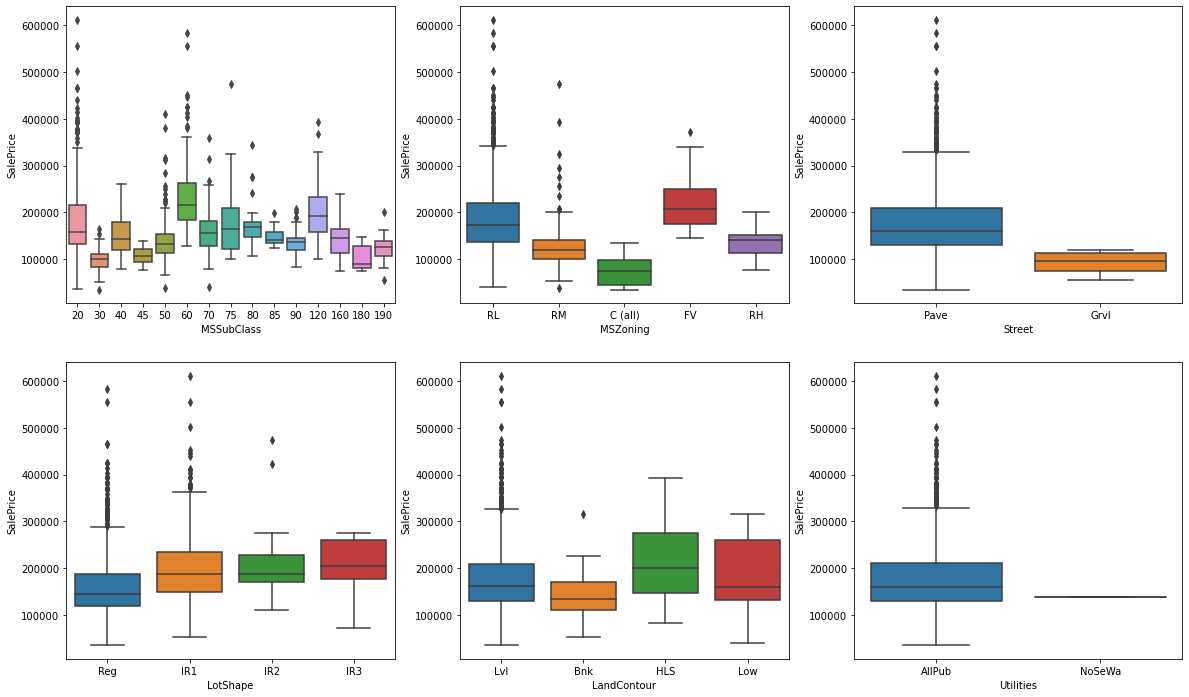

In [135]:
# Visualizing categorical variables. Plotting box plots for those.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = house_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'Street', y = 'SalePrice', data = house_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = house_price)
plt.subplot(2,3,5)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = house_price)
plt.subplot(2,3,6)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = house_price)
plt.show()

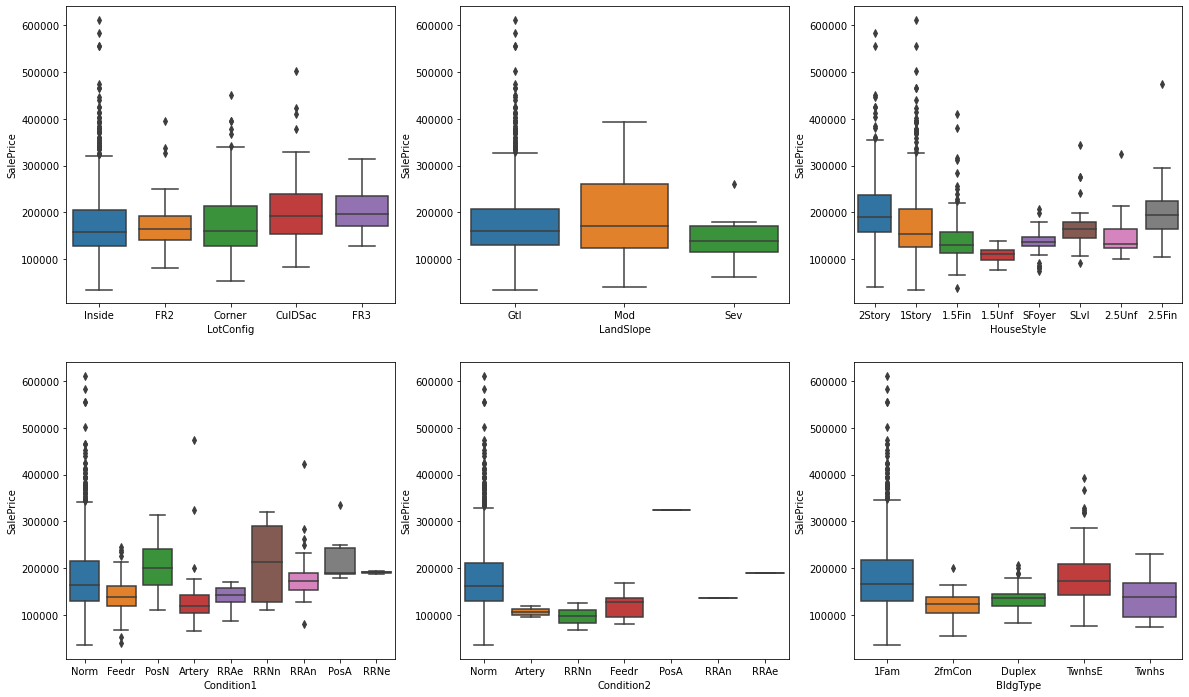

In [136]:
# Visualizing categorical variables. Plotting box plots for those.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = house_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = house_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = house_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = house_price)
plt.subplot(2,3,5)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = house_price)
plt.subplot(2,3,6)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = house_price)
plt.show()

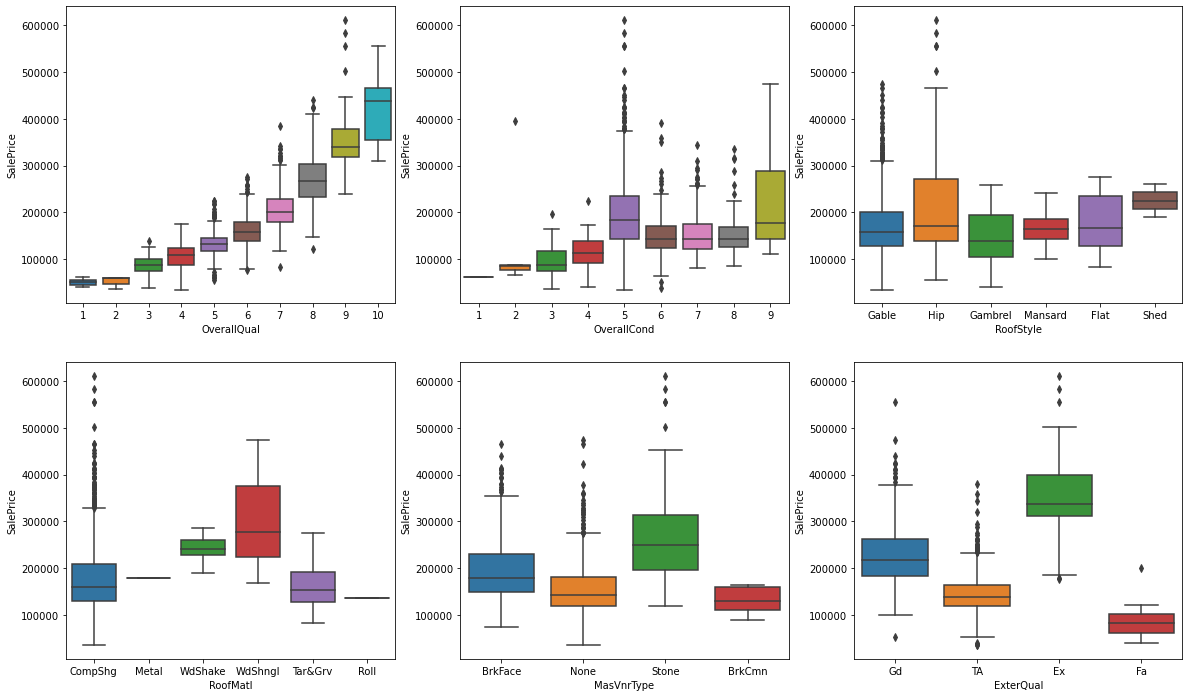

In [137]:
# Visualizing categorical variables. Plotting box plots for those.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = house_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = house_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = house_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = house_price)
plt.subplot(2,3,5)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = house_price)
plt.subplot(2,3,6)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = house_price)
plt.show()

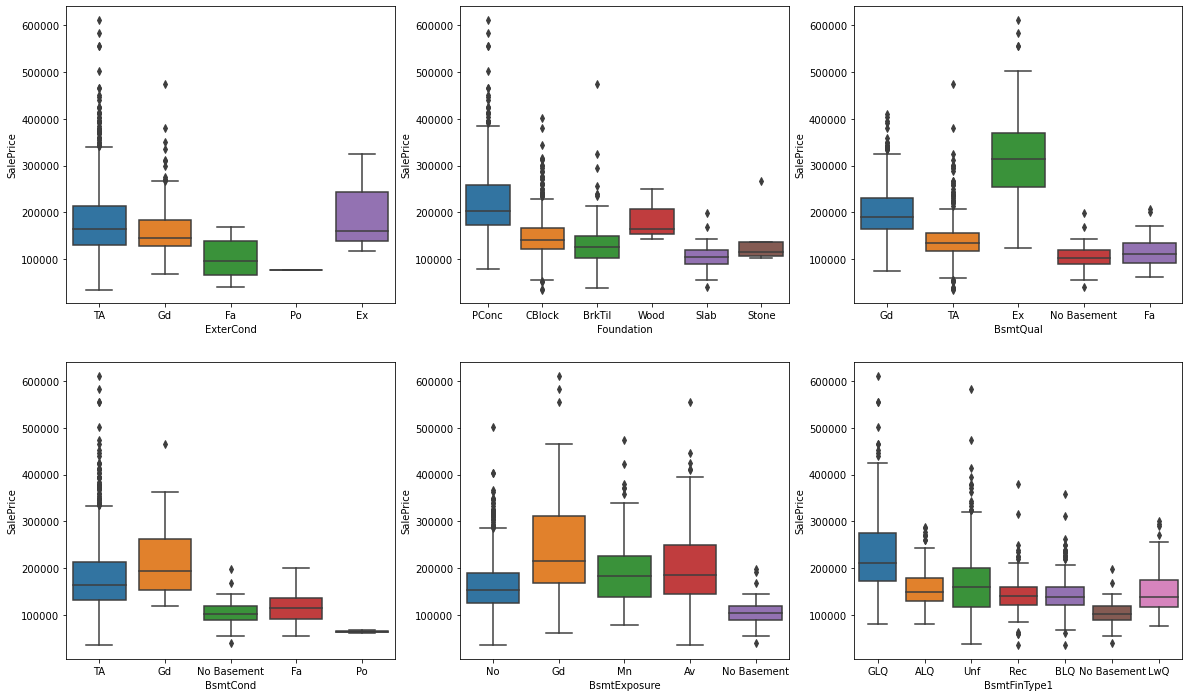

In [138]:
# Visualizing categorical variables. Plotting box plots for those.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = house_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = house_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = house_price)
plt.subplot(2,3,5)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house_price)
plt.subplot(2,3,6)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = house_price)
plt.show()

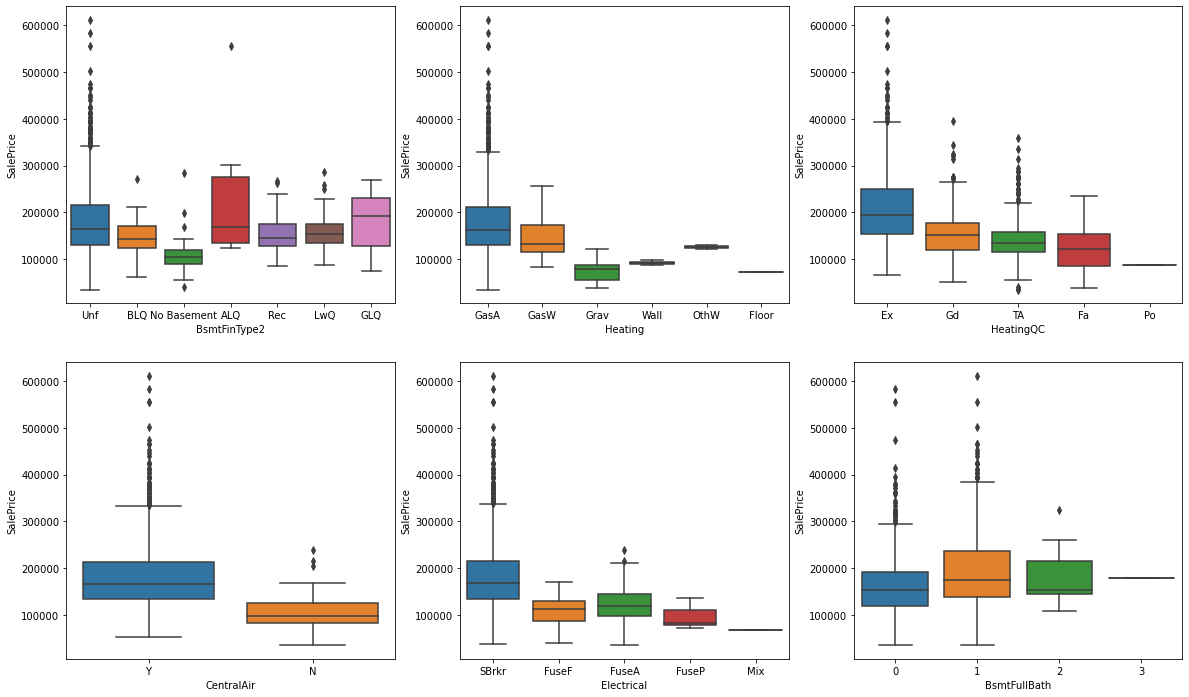

In [139]:
# Visualizing categorical variables. Plotting box plots for those.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = house_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = house_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = house_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = house_price)
plt.subplot(2,3,5)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = house_price)
plt.subplot(2,3,6)
sns.boxplot(x = 'BsmtFullBath', y = 'SalePrice', data = house_price)
plt.show()

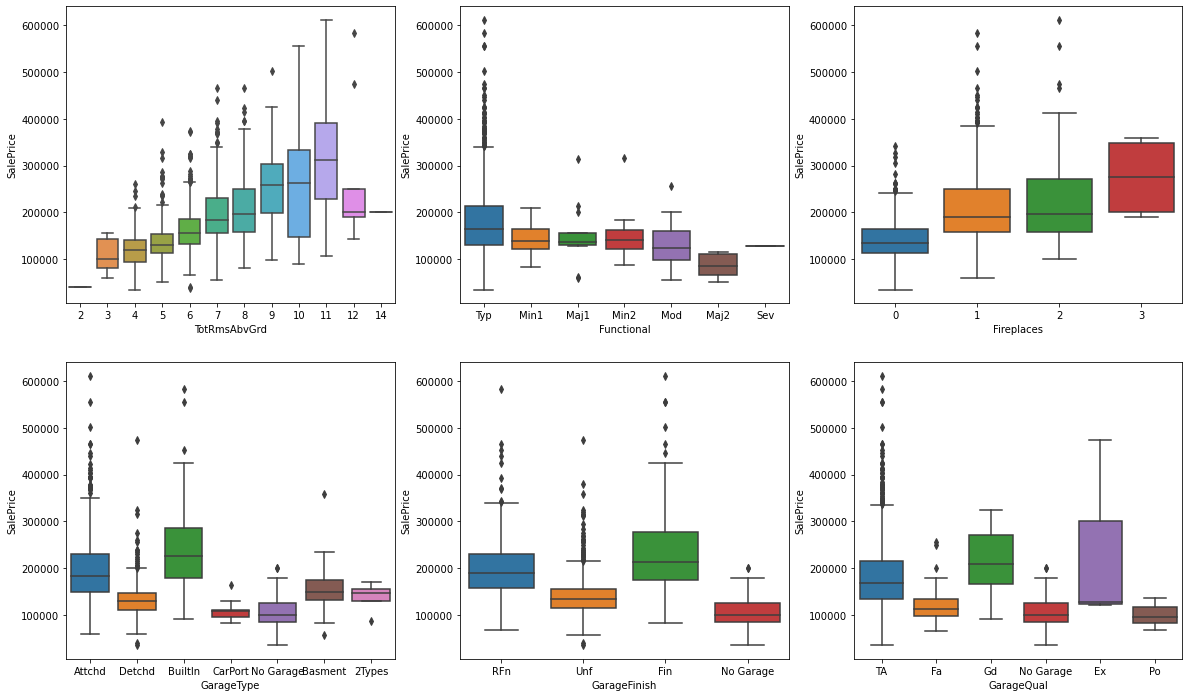

In [140]:
# Visualizing categorical variables. Plotting box plots for those.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = house_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = house_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'Fireplaces', y = 'SalePrice', data = house_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = house_price)
plt.subplot(2,3,5)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = house_price)
plt.subplot(2,3,6)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = house_price)
plt.show()

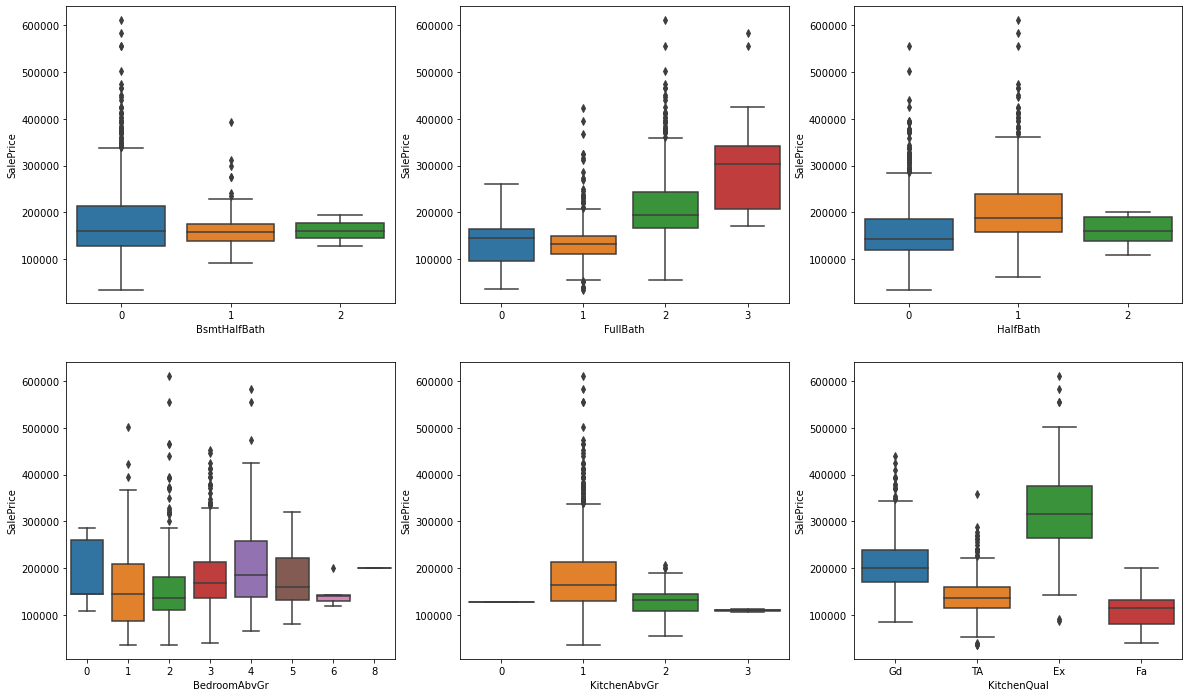

In [141]:
# Visualizing categorical variables. Plotting box plots for those.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'BsmtHalfBath', y = 'SalePrice', data = house_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'FullBath', y = 'SalePrice', data = house_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'HalfBath', y = 'SalePrice', data = house_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'BedroomAbvGr', y = 'SalePrice', data = house_price)
plt.subplot(2,3,5)
sns.boxplot(x = 'KitchenAbvGr', y = 'SalePrice', data = house_price)
plt.subplot(2,3,6)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = house_price)
plt.show()

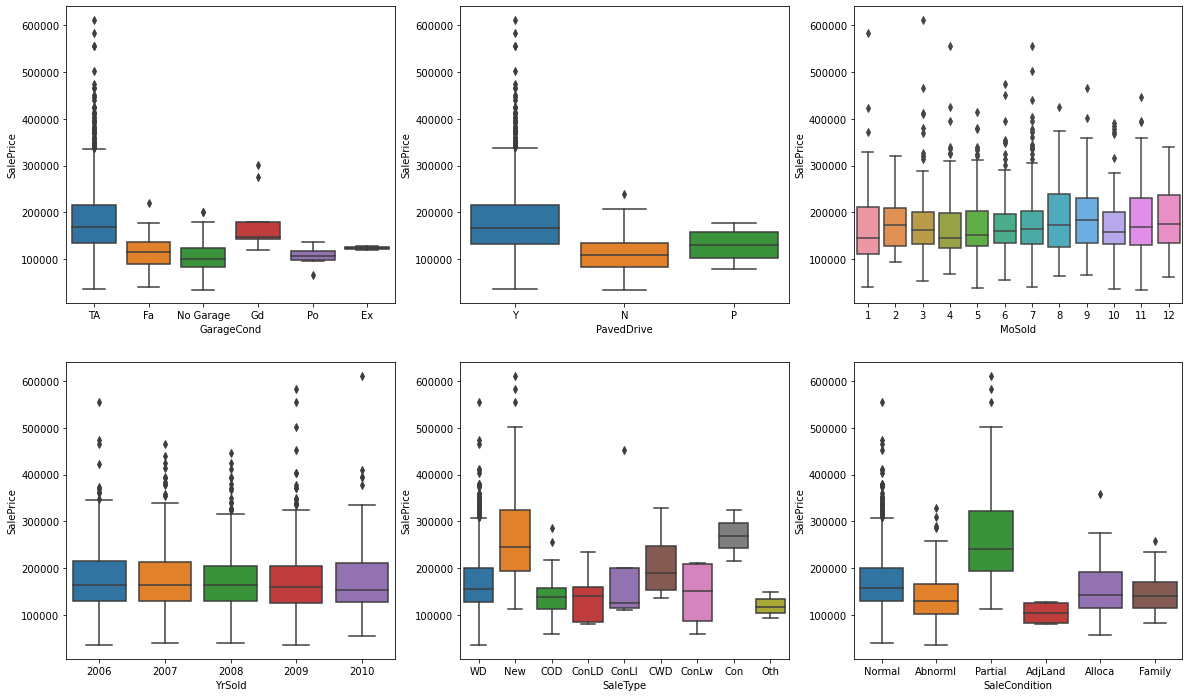

In [142]:
# Visualizing categorical variables. Plotting box plots for those.
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = house_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = house_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'MoSold', y = 'SalePrice', data = house_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = house_price)
plt.subplot(2,3,5)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = house_price)
plt.subplot(2,3,6)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = house_price)
plt.show()

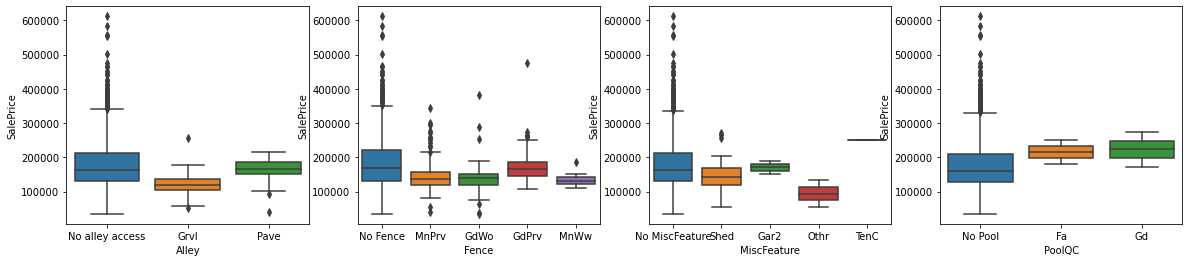

In [143]:
# Visualizing categorical variables. Plotting box plots for those.
plt.figure(figsize=(20, 4))
plt.subplot(1,4,1)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = house_price)
plt.subplot(1,4,2)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = house_price)
plt.subplot(1,4,3)
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = house_price)
plt.subplot(1,4,4)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = house_price)
plt.show()

Bivariate analysis Swos that

    MSZoning as "Floating Village Residential"
    Street as "Paved"
    Utilities as "All public Utilities (E,G,W,& S)"
    Lotshape as "IR3"
    LandContour as "HLS"
    BldgType as "Townhouse End Unit" and "Single-family Detached"
    HouseStyle as "Two story"
    MasVnrType as "Stone"
    Foundation as "Wood"
    ExterQual as "Excellent"
    KitchenQual as "Excellent"
    Functional as "Typical Functionality"
    SaleCondition as "Home was not completed when last assessed (associated with New Homes)"
    Fence as "No Fence"
    PooIq as "No pool"
    Saletype as "New" is most significant against Sale price Target Variable
    
  
 

In [144]:
house_price_numeric = house_price.select_dtypes(include=['float64', 'int64'])
house_price_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,19,19,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,46,46,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,21,20,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,107,52,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,22,22,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [145]:
house_price_numeric["LotFrontage"] = house_price_numeric["LotFrontage"].astype("int64")
house_price_numeric["MasVnrArea"] = house_price_numeric["MasVnrArea"].astype('int64')
house_price_numeric["GarageYrBlt"] = house_price_numeric["GarageYrBlt"].astype('int64')


In [146]:
house_price_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LotFrontage    1412 non-null   int64
 1   LotArea        1412 non-null   int64
 2   YearBuilt      1412 non-null   int64
 3   YearRemodAdd   1412 non-null   int64
 4   MasVnrArea     1412 non-null   int64
 5   BsmtFinSF1     1412 non-null   int64
 6   BsmtFinSF2     1412 non-null   int64
 7   BsmtUnfSF      1412 non-null   int64
 8   TotalBsmtSF    1412 non-null   int64
 9   1stFlrSF       1412 non-null   int64
 10  2ndFlrSF       1412 non-null   int64
 11  LowQualFinSF   1412 non-null   int64
 12  GrLivArea      1412 non-null   int64
 13  GarageYrBlt    1412 non-null   int64
 14  GarageArea     1412 non-null   int64
 15  WoodDeckSF     1412 non-null   int64
 16  OpenPorchSF    1412 non-null   int64
 17  EnclosedPorch  1412 non-null   int64
 18  3SsnPorch      1412 non-null   int64
 19  Screen

In [147]:
# correlation matrix
cor = house_price_numeric.corr()
cor

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.234729,-0.031492,-0.067586,0.069880,0.003636,-0.013507,0.182130,0.196900,0.199362,...,-0.017127,0.060187,0.026614,0.027083,0.034232,-0.003846,-0.059976,0.018435,-0.009235,0.204646
LotArea,0.234729,1.000000,-0.058096,-0.050317,0.120467,0.158973,0.075223,0.098625,0.303866,0.400672,...,0.147400,0.147122,-0.019003,0.085602,0.102038,0.066878,0.057238,0.014233,-0.034674,0.385733
YearBuilt,-0.031492,-0.058096,1.000000,0.602153,-0.318802,-0.248495,0.045510,-0.150062,-0.406248,-0.289692,...,-0.232645,-0.182217,0.376934,-0.031762,0.052062,-0.003212,0.034746,-0.010885,0.017452,-0.554456
YearRemodAdd,-0.067586,-0.050317,0.602153,1.000000,-0.172270,-0.126103,0.063458,-0.180066,-0.303455,-0.247051,...,-0.213829,-0.227984,0.210590,-0.046493,0.038216,0.012985,0.009803,-0.021093,-0.036339,-0.536651
MasVnrArea,0.069880,0.120467,-0.318802,-0.172270,1.000000,0.232791,-0.066102,0.112230,0.340446,0.328201,...,0.152114,0.128949,-0.100868,0.031348,0.062528,-0.009966,-0.031019,0.011210,0.010743,0.461621
BsmtFinSF1,0.003636,0.158973,-0.248495,-0.126103,0.232791,1.000000,-0.052595,-0.535828,0.444703,0.368079,...,0.174821,0.067520,-0.109696,0.033422,0.070203,0.003956,0.004870,0.008756,0.031947,0.384809
BsmtFinSF2,-0.013507,0.075223,0.045510,0.063458,-0.066102,-0.052595,1.000000,-0.203160,0.117542,0.106848,...,0.070460,0.016049,0.040674,-0.030122,0.086250,0.050365,0.005351,-0.012794,0.025084,-0.014751
BsmtUnfSF,0.182130,0.098625,-0.150062,-0.180066,0.112230,-0.535828,-0.203160,1.000000,0.447161,0.335406,...,-0.001308,0.127534,-0.018785,0.021337,-0.006432,-0.023923,-0.023631,0.030583,-0.044972,0.219152
TotalBsmtSF,0.196900,0.303866,-0.406248,-0.303455,0.340446,0.444703,0.117542,0.447161,1.000000,0.793653,...,0.209751,0.216096,-0.119524,0.046439,0.100633,-0.002065,-0.018525,0.037462,-0.005591,0.636647
1stFlrSF,0.199362,0.400672,-0.289692,-0.247051,0.328201,0.368079,0.106848,0.335406,0.793653,1.000000,...,0.210826,0.186257,-0.092222,0.067151,0.105014,0.031779,-0.020845,0.050909,-0.007957,0.617199


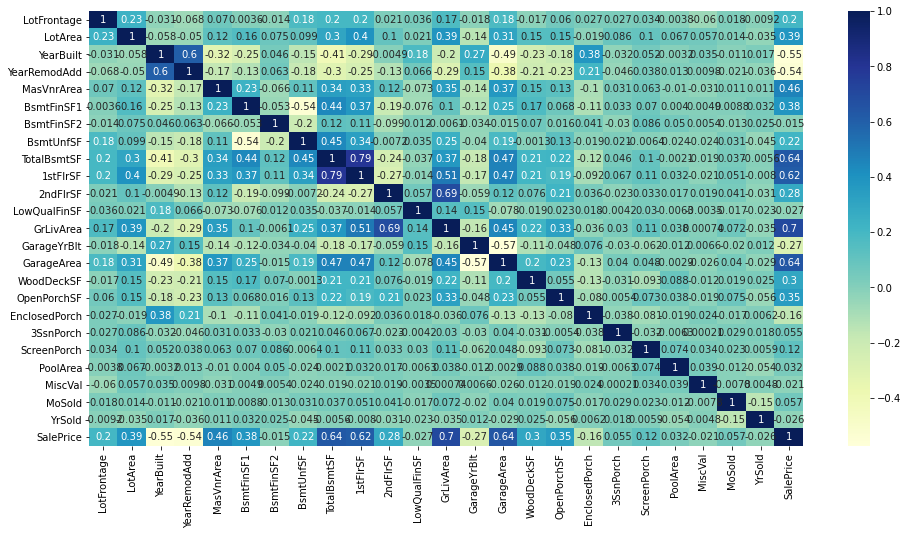

In [148]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


### Creating Dummy Variables

In [149]:
# creating dummy variables for categorical variables

house_data_categorical =house_price.select_dtypes(include=['object'])
house_data_categorical.head(5)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,2,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal
1,20,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,2,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal
2,60,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,2,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal
3,70,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,3,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Abnorml
4,60,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,3,TA,TA,Y,No Pool,No Fence,No MiscFeature,WD,Normal


In [150]:
# convert into dummies for cat variable
house_dummies = pd.get_dummies(house_data_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [151]:
# drop original categorical variables 
house_price_final = house_price.drop(list(house_data_categorical.columns), axis=1)

In [152]:
# concat dummy variables 
hose_data_final_set = pd.concat([house_price_final, house_dummies], axis=1)

In [153]:
hose_data_final_set.head(5)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,19,19,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,46,46,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,21,20,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,107,52,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,22,22,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [154]:
print(hose_data_final_set.columns)


Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=313)


In [155]:
hose_data_final_set.shape

(1412, 313)

### Splitting data into Train and Test sets

In [156]:
df_train,df_test = train_test_split(hose_data_final_set,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(988, 313)
(424, 313)


### Rescaling feature using Min-Max scaling

In [157]:
scaler = MinMaxScaler()

In [158]:
# Apply scaler() to all numeric columns 

df_train[house_price_numeric.columns] = scaler.fit_transform(df_train[house_price_numeric.columns])

df_train.head(5)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
51,0.285714,0.198569,0.550725,1.000000,0.0,0.000000,0.000000,0.379006,0.263736,0.206320,...,0,0,0,0,1,0,0,0,1,0
211,0.456044,0.366589,0.007246,0.016667,0.0,0.016453,0.000000,0.546215,0.391726,0.390335,...,0,0,0,0,1,0,0,0,1,0
555,0.318681,0.204196,0.637681,1.000000,0.0,0.000000,0.000000,0.461217,0.320944,0.314126,...,0,0,0,0,1,0,0,0,1,0
645,0.000000,0.371011,0.282609,0.650000,0.0,0.128885,0.023745,0.308407,0.317065,0.282993,...,0,0,0,0,1,0,0,0,1,0
1112,0.401099,0.233138,0.384058,0.883333,0.0,0.323583,0.000000,0.050163,0.263736,0.206320,...,0,0,0,0,1,0,0,0,1,0


In [159]:
df_train['SalePrice']

51      0.138013
211     0.261982
555     0.135412
645     0.187861
1112    0.164714
114     0.389419
1036    0.486513
590     0.261809
1116    0.258688
530     0.242910
24      0.206499
417     0.353875
943     0.187427
775     0.220370
160     0.221237
964     0.312090
1201    0.282615
1239    0.400515
340     0.291284
850     0.167488
914     0.240713
612     0.392886
1185    0.121368
580     0.254873
1353    0.650361
665     0.339138
1403    0.430029
975     0.225572
549     0.395487
1083    0.216902
275     0.294925
190     0.485646
108     0.138880
853     0.213435
1147    0.242043
1388    0.594011
1019    0.309645
168     0.257648
864     0.373953
1236    0.243777
800     0.286256
688     0.619152
655     0.092067
28      0.299259
337     0.310529
647     0.208233
997     0.260248
1274    0.180492
1380    0.040918
420     0.297179
1195    0.244644
660     0.282615
1128    0.312263
712     0.267184
1289    0.426696
1149    0.187427
1269    0.189161
815     0.329428
439     0.1302

In [160]:
y_train=df_train.pop('SalePrice')
X_train=df_train

In [161]:
# Apply scaler() to all numeric columns 


df_test[house_price_numeric.columns] = scaler.transform(df_test[house_price_numeric.columns])

df_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
361,0.000000,0.315299,0.507246,0.466667,0.0,0.182358,0.0,0.224803,0.285391,0.286245,...,0,0,0,0,1,0,0,0,1,0
519,0.291209,0.386607,0.608696,0.100000,0.0,0.000000,0.0,0.592661,0.412411,0.420074,...,0,0,0,0,1,0,0,0,1,0
553,0.368132,0.300547,0.442029,0.116667,0.0,0.000000,0.0,0.000000,0.000000,0.350372,...,0,0,0,0,1,0,0,0,1,0
551,0.274725,0.188922,0.384058,0.883333,0.0,0.140768,0.0,0.287970,0.299935,0.258364,...,0,0,0,0,1,0,0,0,1,0
897,0.351648,0.229842,0.224638,0.516667,0.0,0.000000,0.0,0.000000,0.000000,0.347584,...,0,0,0,0,1,0,1,0,0,0


In [162]:
y_test=df_test.pop('SalePrice')
X_test=df_test

In [163]:
print(X_train.shape)
print(y_train.shape)

(988, 312)
(988,)


In [164]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [165]:
#Predict mode
y_train_pred=reg.predict(X_train)


In [166]:
#find r2 score
r2_score(y_train,y_train_pred)

0.9545440289276412

In [167]:
#calculate RSS,MSE,RMSE
rss=np.sum(np.square(y_train-y_train_pred))
mse=mean_squared_error(y_train,y_train_pred)
rmse=mse**0.5
print("RSS= " ,rss)
print("MSE= " ,mse)
print("RMSE=" , rmse)

RSS=  0.7314013799131911
MSE=  0.0007402847974829869
RMSE= 0.02720817519575664


In [168]:
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9545440289276412
-1.0814913386204875e+21
0.7314013799131911
7.251986646690129e+21
0.0007402847974829869
1.7103742091250305e+19


### Ridge and Lasso Regression
Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [169]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [170]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [171]:
#Fitting Ridge model for alpha = 4.0 and printing coefficients which have been penalised
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 3.73917415e-04  5.41293727e-02 -3.51790619e-02 -2.19411901e-02
  1.85020118e-02  6.57823334e-02  2.21589125e-02  1.85835196e-02
  7.00078541e-02  8.11220017e-02  5.34369421e-02  5.41075876e-03
  8.66933320e-02 -5.51544189e-03  1.35515552e-02  1.43297670e-02
  1.93582712e-02  3.26476120e-03  1.50890593e-02  3.08009930e-02
  1.21728130e-02  1.77436724e-03 -7.09602509e-03 -2.58094572e-03
 -3.47683223e-03  8.82690320e-03  1.68455868e-03 -1.67551646e-03
  5.87517142e-03  5.03679282e-03  9.95391915e-03 -2.80579904e-03
 -7.04369625e-03 -8.19172240e-03 -8.51995489e-03 -1.40026151e-02
 -4.34631360e-03 -7.35799633e-03  1.69756196e-02  1.08932457e-02
  1.51091591e-02  6.78054748e-03  1.39926576e-02  3.96578517e-03
  2.60238260e-03  1.01477700e-02  4.47191133e-03 -4.39569948e-04
  1.02465703e-02 -1.77090473e-02 -2.21184453e-03 -6.15708040e-03
  1.06788443e-02 -1.00862701e-02 -7.65957469e-03 -9.47071268e-04
  3.11470041e-03 -1.57965220e-02  2.84396816e-03  6.67410647e-03
  1.08230452e-02 -5.28711

In [172]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9416391454684006
0.9132665845149273
0.9390451579920435
0.581594644781799
0.0009504505647692748
0.001371685482975941


In [173]:
# Total number of coff
ridge.coef_.size

312

In [174]:
# Number of Zero value coff
np.count_nonzero(ridge.coef_==0)

5

## Lasso

In [175]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [176]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [177]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [178]:
lasso.coef_

array([-0.00000000e+00,  6.11795446e-02, -7.24059893e-02, -1.90974456e-02,
        1.96683008e-02,  5.88103333e-02,  1.75332494e-02, -0.00000000e+00,
        1.13873497e-01,  0.00000000e+00,  1.19074652e-03, -4.94995745e-03,
        2.73652642e-01, -1.12954510e-02,  1.78683013e-03,  1.00110861e-02,
        1.31647296e-02,  2.18320837e-03,  0.00000000e+00,  2.55011342e-02,
        0.00000000e+00,  0.00000000e+00, -6.85829895e-03, -6.91941941e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        4.51976946e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -2.57134606e-03, -6.01100793e-03, -1.53089586e-02,
       -0.00000000e+00, -0.00000000e+00,  5.58239755e-03,  0.00000000e+00,
        6.19993795e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  4.86060387e-03,  0.00000000e+00, -0.00000000e+00,
        8.46834702e-03, -1.16835352e-02, -0.00000000e+00, -0.00000000e+00,
        9.63164586e-03, -

In [179]:
# Total Number of  coff
lasso.coef_.size

312

In [180]:
# Number of Zero value coff
np.count_nonzero(lasso.coef_==0)

176

In [181]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9403499026334465
0.9092163239090469
0.9597894951227478
0.6087538413287865
0.000971446857411688
0.0014357401918131758


In [182]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.545440e-01,0.941639,0.940350
1,R2 Score (Test),-1.081491e+21,0.913267,0.909216
2,RSS (Train),7.314014e-01,0.939045,0.959789
3,RSS (Test),7.251987e+21,0.581595,0.608754
4,MSE (Train),2.720818e-02,0.030829,0.031168
5,MSE (Test),4.135667e+09,0.037036,0.037891


### Lets observe the changes in the coefficients after regularization

In [183]:
betas = pd.DataFrame(index=X_train.columns)

In [184]:
betas.rows = X_train.columns

In [185]:
betas['Linear'] = reg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [186]:
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
LotFrontage,4.893921e-04,0.000374,-0.000000
LotArea,7.376930e-02,0.054129,0.061180
YearBuilt,-1.032275e-01,-0.035179,-0.072406
YearRemodAdd,-1.680600e-02,-0.021941,-0.019097
MasVnrArea,1.514452e-02,0.018502,0.019668
BsmtFinSF1,9.361306e+10,0.065782,0.058810
BsmtFinSF2,6.306474e+10,0.022159,0.017533
BsmtUnfSF,9.211560e+10,0.018584,-0.000000
TotalBsmtSF,-1.323761e+11,0.070008,0.113873
1stFlrSF,5.514728e+10,0.081122,0.000000


In [187]:
betas.nlargest(5, 'Ridge')['Ridge']

GrLivArea         0.086693
1stFlrSF          0.081122
OverallQual_10    0.076030
TotalBsmtSF       0.070008
BsmtFinSF1        0.065782
Name: Ridge, dtype: float64

In [188]:
betas.nlargest(5, 'Lasso')["Lasso"]

GrLivArea         0.273653
OverallQual_10    0.158628
TotalBsmtSF       0.113873
OverallQual_9     0.072686
LotArea           0.061180
Name: Lasso, dtype: float64

In [189]:

betas.nlargest(5, 'Linear')["Linear"]

BsmtFinSF1       9.361306e+10
BsmtUnfSF        9.211560e+10
OverallCond_9    6.800527e+10
OverallCond_8    6.800527e+10
OverallCond_7    6.800527e+10
Name: Linear, dtype: float64

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

 

Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

 

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

 

Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

 

In [190]:
#Fitting Ridge model for alpha = 8.0 and printing coefficients which have been penalised
alpha = 8.0
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
print(ridge2.coef_[:5])

[ 0.00370196  0.04567457 -0.02204987 -0.0228358   0.01900654]


In [191]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9343140390179773
0.9105899025173947
1.0569085066227908
0.5995432509429006
0.0010697454520473592
0.001414017101280426


In [192]:
#Fitting Ridge model for alpha = 0.0002 and printing coefficients which have been penalised

alpha =0.0002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [193]:
lasso2.coef_[:5]

array([ 0.        ,  0.05674057, -0.05316614, -0.02196729,  0.01805804])

In [194]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9343707276049392
0.9089162353523307
1.0559963687946639
0.610766098041732
0.0010688222356221293
0.0014404860802871037


In [195]:
betas_d2 = pd.DataFrame(index=X_train.columns)

In [196]:
betas_d2.rows = X_train.columns

In [197]:
betas_d2['Ridge2'] = ridge2.coef_
betas_d2['Lasso2'] = lasso2.coef_

In [198]:
betas_d2.nlargest(5, 'Ridge2')['Ridge2']

GrLivArea         0.071573
1stFlrSF          0.070584
TotalBsmtSF       0.057365
OverallQual_10    0.056069
BsmtFinSF1        0.053706
Name: Ridge2, dtype: float64

In [199]:
betas_d2.nlargest(5, 'Lasso2')['Lasso2']

GrLivArea         0.264364
OverallQual_10    0.151734
TotalBsmtSF       0.115580
OverallQual_9     0.076910
LotArea           0.056741
Name: Lasso2, dtype: float64

Ans 1

What is the optimal value of alpha for ridge and lasso regression? 

Alpha for Lasso is 0.0001 and Alpha for ridge is 4.0

What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
Doubling alpha value is impacting cofficent and r2 score train,r2 score test,rss value train,rss value test,mse value train and mse value of test.


Fore Ridge when alpha = 4.0, then 
r2 score train=0.9416391454684006
r2 score test=0.9132665845149273
rss value train=0.9390451579920435
rss value test=0.581594644781799
mse value train=0.0009504505647692748
mse value of test=0.001371685482975941


Fore Ridge when alpha = 8.0, then 
r2 score train=0.9343140390179773
r2 score test=0.9105899025173947
rss value train=1.0569085066227908
rss value test=0.5995432509429006
mse value train=0.0010697454520473592
mse value of test=0.001414017101280426



Fore Lasso  when alpha = 0.0002, then 
r2 score train=0.9343707276049392
r2 score test=0.9089162353523307
rss value train=1.0559963687946639
rss value test=0.610766098041732
mse value train=0.0010688222356221293
mse value of test=0.0014404860802871037



Fore Lasso  when alpha = 0.0001, then 
r2 score train=0.9403499026334465
r2 score test=0.9092163239090469
rss value train=0.9597894951227478
rss value test=0.6087538413287865
mse value train=0.000971446857411688
mse value of test=0.0014357401918131758





What will be the most important predictor variables after the change is implemented?

For Ridge:

GrLivArea         0.071573
1stFlrSF          0.070584
TotalBsmtSF       0.057365
OverallQual_10    0.056069
BsmtFinSF1        0.053706

For Lasso:

GrLivArea         0.264364
OverallQual_10    0.151734
TotalBsmtSF       0.115580
OverallQual_9     0.076910
LotArea           0.056741

Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?



Ans2:

Lasso model is better because it make future selcetion and make 212 coff as 0.it remove those feture which does not make much impact in predication.

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [200]:
X_train_after_drop=["GrLivArea","OverallQual_10","TotalBsmtSF","OverallQual_9","LotArea"]
X_test_after_drop=["GrLivArea","OverallQual_10","TotalBsmtSF","OverallQual_9","LotArea"]

In [201]:
X_train=X_train.drop(X_train_after_drop,axis=1)
X_test=X_test.drop(X_test_after_drop,axis=1)

In [202]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [203]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [204]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [205]:
# Total  size  coff
lasso.coef_.size

307

In [206]:
# Number of Zero value coff
np.count_nonzero(lasso.coef_==0)

171

In [207]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.935193704824329
0.9110377303191353
1.0427543972846824
0.5965403223735588
0.0010554194304500835
0.001406934722579148


In [208]:
betas = pd.DataFrame(index=X_train.columns)

In [209]:
betas.rows = X_train.columns

In [210]:

betas['Lasso3'] = lasso.coef_

In [211]:
betas.nlargest(5, 'Lasso3')['Lasso3']

1stFlrSF      0.217290
2ndFlrSF      0.166643
BsmtFinSF1    0.126167
BsmtFinSF2    0.067566
BsmtUnfSF     0.063220
Name: Lasso3, dtype: float64

Ans:3

After five most important predictor variables in the lasso model


1stFlrSF      0.217290
2ndFlrSF      0.166643
BsmtFinSF1    0.126167
BsmtFinSF2    0.067566
BsmtUnfSF     0.063220

Question 4

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

As per Occam's Razor simple model robust and generalisable. But need to take care a model should be as simple as necessary but not simpler than that. It is basically trade off between bias and Variance. We need to select correct lamda value which will give optimum bais and variance. When complexity increases, bias reduces and variance increases and when model is simple vise versa. 